In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

np.set_printoptions(precision=12, suppress=True, linewidth=120)
print(tf.__version__)

2.14.0


# 1. Pierwszy model sieci - problem klasyfikacji (Hello World w sieciach neuronowych)

In [14]:
# 1. Załadowanie danych

(X_train, y_train), (X_test, y_test) = load_data()


data = {'X_train' : X_train,
         'y_train' : y_train,
         'X_test' : X_test,
         'y_test' : y_test}

for key, value in data.items():
    print(f'{key} shape: {value.shape}')

"""
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')
"""

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


"\nprint(f'X_train shape: {X_train.shape}')\nprint(f'y_train shape: {y_train.shape}')\nprint(f'X_test shape: {X_test.shape}')\nprint(f'y_test shape: {y_test.shape}')\n"

In [15]:
# Standaryzacja danych
X_train = X_train / 255.
X_test = X_test / 255.

(-0.5, 27.5, 27.5, -0.5)

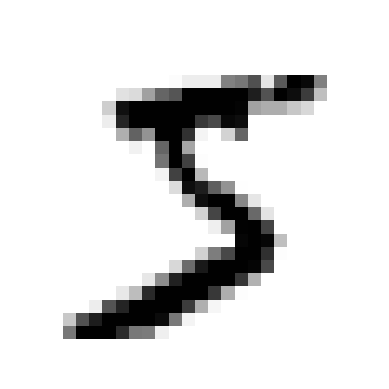

In [23]:
# Wyświetlanie przykładowego obrazu
plt.imshow(X_train[0], cmap='gray_r')
plt.axis('off')

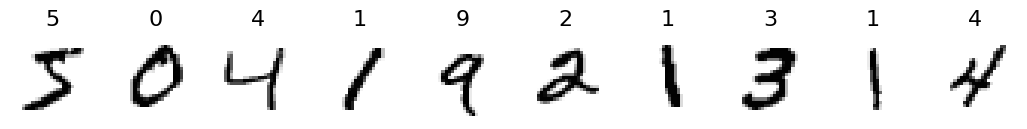

In [29]:
plt.figure(figsize=(13,13))
for i in range(1,11):
    plt.subplot(1,10, i)
    plt.axis('off')
    plt.imshow(X_train[i-1], cmap='gray_r')
    plt.title(y_train[i-1], color='black', fontsize=16)
plt.show()

# Budowa sieci neuronowej

In [33]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Trenowanie modelu

In [34]:
history = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.3001 - accuracy: 0.9115
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1450 - accuracy: 0.9571
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1071 - accuracy: 0.9680
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0866 - accuracy: 0.9727
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0752 - accuracy: 0.9765


# Ocena modelu

In [35]:
model.evaluate(X_test, y_test, verbose=2)

313/313 - 1s - loss: 0.0742 - accuracy: 0.9777 - 1s/epoch - 4ms/step


[0.07420167326927185, 0.9776999950408936]

In [36]:
metrics = pd.DataFrame(history.history)
metrics

,loss,accuracy
0,0.300068,0.911550
1,0.144998,0.957067
2,0.107103,0.967967
3,0.086617,0.972667
4,0.075233,0.976517


In [38]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(y=metrics['loss'], name='loss'), row=1, col=1)
fig.add_trace(go.Scatter(y=metrics['accuracy'], name='accuracy'), row=2, col=1)
fig.update_layout(width=800, height=400)

# Predykcja na podstawie modelu

In [39]:
model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


array([[0.000000008261, 0.000000000697, 0.000008855744, ..., 0.9999437     , 0.000000179536, 0.000000810775],
       [0.000000001235, 0.000022765686, 0.99997324    , ..., 0.            , 0.000000150321, 0.            ],
       [0.000000144537, 0.99950844    , 0.000063287276, ..., 0.00020554554 , 0.00016652475 , 0.000000241819],
       ...,
       [0.00000000005 , 0.00000001916 , 0.000000000074, ..., 0.000003096106, 0.000000759848, 0.00003785793 ],
       [0.000000001145, 0.000000012198, 0.000000000038, ..., 0.000000000456, 0.000035841433, 0.000000000022],
       [0.000000000037, 0.            , 0.000000010863, ..., 0.000000000002, 0.000000000196, 0.            ]],
      dtype=float32)

In [41]:
y_pred = np.argmax(model.predict(X_test), axis=1)
y_pred

313/313 [==============================] - 2s 5ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [43]:
# Tworzę df, dzięki któremu przeanalizuje które elementy/obrazu model źle sklasyfikował
pred = pd.concat([pd.DataFrame(y_test, columns=['y_test']), pd.DataFrame(y_pred, columns=['y_pred'])], axis=1)
pred.head()

,y_test,y_pred
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4


In [47]:
misclassified = pred[ pred['y_test'] != pred['y_pred'] ]
misclassified.index[:10] # Wyświetlenie 10 pierwszych elementów

Int64Index([18, 115, 151, 247, 321, 381, 445, 448, 449, 495], dtype='int64')

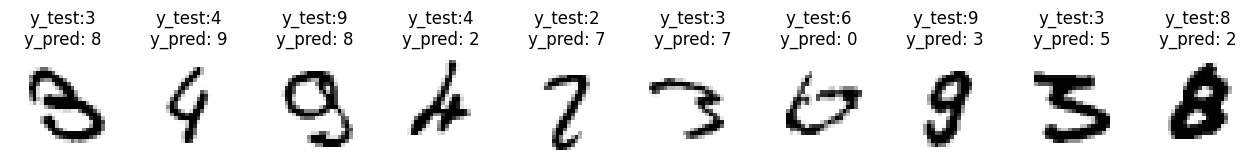

In [49]:
plt.figure(figsize = (16,16))
for i,j in zip(range(1,11), misclassified.index[:10]):
    plt.subplot(1,10, i)
    plt.axis('off')
    plt.imshow(X_test[j], cmap='gray_r')
    plt.title(f'y_test:{y_test[j]}\ny_pred: {y_pred[j]}', color='black', fontsize=12)

# CZĘŚĆ 2

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import plotly.express as px

In [ ]:
# utworzenie instancji klasy Sequential
from tensorflow.keras.models import Sequential

model = Sequential()
print(model)

In [ ]:
from tensorflow.keras.layers import Dense

model.add(Dense(units=4, input_shape=(10,)))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 44        
                                                                 
Total params: 44 (176.00 Byte)
Trainable params: 44 (176.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.add(Dense(units=2))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 44        
                                                                 
 dense_1 (Dense)             (None, 2)                 10        
                                                                 
Total params: 54 (216.00 Byte)
Trainable params: 54 (216.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
 from tensorflow.keras.activations import linear

 random_data = np.linspace(start=-3, stop=3, num=300)

data = pd.DataFrame({'data': random_data, 'linear' : linear(random_data)})
data.head()

,data,linear
0,-3.000000,-3.000000
1,-2.979933,-2.979933
2,-2.959866,-2.959866
3,-2.939799,-2.939799
4,-2.919732,-2.919732


In [ ]:
px.line(data, x='data', y='linear', width=500, height=400, range_y=[-3,3])

In [ ]:
from tensorflow.keras.activations import sigmoid

data = pd.DataFrame({'data': random_data, 'sigmoid' : sigmoid(random_data)})
data.head()

,data,sigmoid
0,-3.000000,0.047426
1,-2.979933,0.048341
2,-2.959866,0.049272
3,-2.939799,0.050221
4,-2.919732,0.051187


In [ ]:
px.line(data, x='data', y='sigmoid', width=500, height=400, range_y=[-0.5, 1.5])

In [ ]:
from tensorflow.keras.activations import relu

data = pd.DataFrame({'data' : random_data,
                     'relu' : relu(random_data)})
data.head()

,data,relu
0,-3.000000,0.0
1,-2.979933,0.0
2,-2.959866,0.0
3,-2.939799,0.0
4,-2.919732,0.0


In [ ]:
px.line(data, x='data', y='relu', width=500, height=400, range_y=[-0.5, 1.5])

In [ ]:
from tensorflow.keras.activations import tanh

data = pd.DataFrame({'data': random_data,
                     'tanh' : tanh(random_data)})

data.head()

,data,tanh
0,-3.000000,-0.995055
1,-2.979933,-0.994853
2,-2.959866,-0.994643
3,-2.939799,-0.994424
4,-2.919732,-0.994196


In [ ]:
px.line(data, x='data', y='tanh', width=500, height=400, range_y = [-1.5, 1.5])

In [ ]:
# Tworze nowy model
model = Sequential()

model.add(Dense(units=8, activation='relu', input_shape=(10,)))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8)                 88        
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 97 (388.00 Byte)
Trainable params: 97 (388.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Kompilacja modelu

In [ ]:
# klasyfikacja binarna
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# klasyfikacja wieloklasowa
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# regresja
model.compile(optimizer='rmsprop',
              loss='mse')

# Trenowanie modeli

In [ ]:
"""
model.fit(data ,labels, epochs=10, batch_size=32)

model.fit(data, labels, epochs=10, batch_size=32, validation_split=0.2)

model.fit(data, labels, epochs=10, batch_size=32, validation_data(x_val, y_val))
"""

# Przykład klasyfikacji binarnej

In [ ]:
data = np.random.randn(10000, 150)
labels = np.random.randint(2, size=(10000, 1))

print(data.shape)
print(labels.shape)

(10000, 150)
(10000, 1)


In [ ]:
data[:3]

In [ ]:
labels[:10]

array([[0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0]])

In [ ]:
# Buduje model
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(150,)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(data, labels, epochs=20)

Epoch 1/20
313/313 [==============================] - 2s 2ms/step - loss: 0.7439 - accuracy: 0.5045
Epoch 2/20
313/313 [==============================] - 1s 2ms/step - loss: 0.6958 - accuracy: 0.5468
Epoch 3/20
313/313 [==============================] - 1s 2ms/step - loss: 0.6775 - accuracy: 0.5752
Epoch 4/20
313/313 [==============================] - 1s 2ms/step - loss: 0.6647 - accuracy: 0.5992
Epoch 5/20
313/313 [==============================] - 1s 2ms/step - loss: 0.6524 - accuracy: 0.6186
Epoch 6/20
313/313 [==============================] - 1s 3ms/step - loss: 0.6392 - accuracy: 0.6375
Epoch 7/20
313/313 [==============================] - 1s 3ms/step - loss: 0.6266 - accuracy: 0.6573
Epoch 8/20
313/313 [==============================] - 1s 3ms/step - loss: 0.6128 - accuracy: 0.6699
Epoch 9/20
313/313 [==============================] - 1s 2ms/step - loss: 0.5993 - accuracy: 0.6872
Epoch 10/20
313/313 [==============================] - 1s 2ms/step - loss: 0.5863 - accuracy: 0.6978

In [ ]:
# Buduje model
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(150,)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(data, labels, epochs=20, batch_size=64)
# batch_size to parametr który odpowiada za aktualizację wag co określoną ilość próbek (domyślnie jest to 32)

Epoch 1/20
157/157 [==============================] - 1s 2ms/step - loss: 0.7535 - accuracy: 0.5056
Epoch 2/20
157/157 [==============================] - 0s 2ms/step - loss: 0.7065 - accuracy: 0.5297
Epoch 3/20
157/157 [==============================] - 0s 2ms/step - loss: 0.6890 - accuracy: 0.5534
Epoch 4/20
157/157 [==============================] - 0s 2ms/step - loss: 0.6768 - accuracy: 0.5718
Epoch 5/20
157/157 [==============================] - 0s 2ms/step - loss: 0.6671 - accuracy: 0.5935
Epoch 6/20
157/157 [==============================] - 0s 2ms/step - loss: 0.6573 - accuracy: 0.6092
Epoch 7/20
157/157 [==============================] - 0s 2ms/step - loss: 0.6476 - accuracy: 0.6239
Epoch 8/20
157/157 [==============================] - 0s 2ms/step - loss: 0.6378 - accuracy: 0.6401
Epoch 9/20
157/157 [==============================] - 0s 2ms/step - loss: 0.6277 - accuracy: 0.6542
Epoch 10/20
157/157 [==============================] - 0s 2ms/step - loss: 0.6174 - accuracy: 0.6686

In [ ]:
# Buduje model
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(150,)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(data, labels, epochs=20, batch_size=32, validation_split=0.2) # dodanie zbioru walidacyjnego

Epoch 1/20
250/250 [==============================] - 1s 3ms/step - loss: 0.7570 - accuracy: 0.4933 - val_loss: 0.7282 - val_accuracy: 0.4960
Epoch 2/20
250/250 [==============================] - 1s 2ms/step - loss: 0.6922 - accuracy: 0.5485 - val_loss: 0.7221 - val_accuracy: 0.5105
Epoch 3/20
250/250 [==============================] - 1s 2ms/step - loss: 0.6724 - accuracy: 0.5832 - val_loss: 0.7224 - val_accuracy: 0.5080
Epoch 4/20
250/250 [==============================] - 1s 2ms/step - loss: 0.6571 - accuracy: 0.6135 - val_loss: 0.7232 - val_accuracy: 0.5195
Epoch 5/20
250/250 [==============================] - 1s 2ms/step - loss: 0.6427 - accuracy: 0.6357 - val_loss: 0.7272 - val_accuracy: 0.5155
Epoch 6/20
250/250 [==============================] - 1s 2ms/step - loss: 0.6292 - accuracy: 0.6570 - val_loss: 0.7328 - val_accuracy: 0.5145
Epoch 7/20
250/250 [==============================] - 1s 2ms/step - loss: 0.6146 - accuracy: 0.6741 - val_loss: 0.7417 - val_accuracy: 0.5155
Epoch 

In [ ]:
# Buduje model
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(150,)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(data, labels, epochs=20, batch_size=32, validation_split=0.2, verbose=0) # verbose odpowiada za brak generowania tekstu podczas trenowania modelu

In [ ]:
metrics = history.history
metrics.keys() # atrybut history zawiera metryki dotyczące trenowania modelu, zawiera metryki, które były generowane
# dzięki temu mogę tworzyć wykresy przedstawiające jak wyglądają poszczególne metryki podczas budowania modelu

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
# Buduje model
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(150,)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(data, labels, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/20
250/250 [==============================] - 1s 3ms/step - loss: 0.7424 - accuracy: 0.4999 - val_loss: 0.7225 - val_accuracy: 0.4910
Epoch 2/20
250/250 [==============================] - 1s 2ms/step - loss: 0.6910 - accuracy: 0.5504 - val_loss: 0.7215 - val_accuracy: 0.4805
Epoch 3/20
250/250 [==============================] - 1s 2ms/step - loss: 0.6727 - accuracy: 0.5840 - val_loss: 0.7233 - val_accuracy: 0.4895
Epoch 4/20
250/250 [==============================] - 1s 2ms/step - loss: 0.6579 - accuracy: 0.6081 - val_loss: 0.7290 - val_accuracy: 0.4935
Epoch 5/20
250/250 [==============================] - 1s 2ms/step - loss: 0.6436 - accuracy: 0.6288 - val_loss: 0.7328 - val_accuracy: 0.4930
Epoch 6/20
250/250 [==============================] - 1s 2ms/step - loss: 0.6293 - accuracy: 0.6506 - val_loss: 0.7410 - val_accuracy: 0.4935
Epoch 7/20
250/250 [==============================] - 1s 2ms/step - loss: 0.6145 - accuracy: 0.6718 - val_loss: 0.7498 - val_accuracy: 0.4945
Epoch 

In [ ]:
test_data = np.random.randn(5, 150)
test_labels = np.random.randint(2, size=(5, 1))

In [ ]:
model.predict(test_data)

1/1 [==============================] - 0s 107ms/step


array([[0.10020433],
       [0.4448134 ],
       [0.32260615],
       [0.15257554],
       [0.2802838 ]], dtype=float32)

# Klasyfikacja wieloklasowa

In [ ]:
data = np.random.randn(10000, 150)
labels = np.random.randint(10, size=(10000, 1))

In [ ]:
print(data.shape)
print(labels.shape)

(10000, 150)
(10000, 1)


In [ ]:
from tensorflow.keras.utils import to_categorical
labels = to_categorical(labels, num_classes=10)
labels

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(150,)))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(data, labels, batch_size=32, epochs=30, validation_split=0.2)

Epoch 1/30
250/250 [==============================] - 1s 3ms/step - loss: 2.5382 - accuracy: 0.1031 - val_loss: 2.4510 - val_accuracy: 0.0990
Epoch 2/30
250/250 [==============================] - 1s 2ms/step - loss: 2.3429 - accuracy: 0.1264 - val_loss: 2.4056 - val_accuracy: 0.0905
Epoch 3/30
250/250 [==============================] - 1s 2ms/step - loss: 2.2724 - accuracy: 0.1535 - val_loss: 2.3952 - val_accuracy: 0.0975
Epoch 4/30
250/250 [==============================] - 1s 2ms/step - loss: 2.2310 - accuracy: 0.1766 - val_loss: 2.3956 - val_accuracy: 0.0970
Epoch 5/30
250/250 [==============================] - 1s 2ms/step - loss: 2.2016 - accuracy: 0.1965 - val_loss: 2.4027 - val_accuracy: 0.0940
Epoch 6/30
250/250 [==============================] - 1s 2ms/step - loss: 2.1773 - accuracy: 0.2071 - val_loss: 2.4175 - val_accuracy: 0.0905
Epoch 7/30
250/250 [==============================] - 1s 2ms/step - loss: 2.1568 - accuracy: 0.2198 - val_loss: 2.4285 - val_accuracy: 0.0940
Epoch 

In [ ]:
test_data = np.random.randn(10, 150)

model.predict(test_data)

1/1 [==============================] - 0s 29ms/step


array([[0.06504826, 0.0808562 , 0.01416805, 0.07194555, 0.06975666,
        0.04245844, 0.12760141, 0.03651817, 0.4099456 , 0.08170151],
       [0.10069036, 0.00435639, 0.08610972, 0.04393606, 0.06671822,
        0.10870023, 0.18813787, 0.11169594, 0.25764346, 0.03201171],
       [0.13995776, 0.08300455, 0.13962893, 0.05496543, 0.08652948,
        0.19575703, 0.13213493, 0.03104725, 0.0862835 , 0.05069115],
       [0.11620164, 0.0172481 , 0.10971234, 0.19563773, 0.23358649,
        0.01280635, 0.04826643, 0.00579785, 0.04603692, 0.21470603],
       [0.04646785, 0.07180468, 0.05821892, 0.04138457, 0.03538173,
        0.16205372, 0.31461462, 0.02954718, 0.1409074 , 0.09961927],
       [0.04720266, 0.05055565, 0.06462672, 0.12105044, 0.0818761 ,
        0.31853947, 0.05010347, 0.04238166, 0.09569978, 0.12796395],
       [0.09828379, 0.08589478, 0.02040999, 0.09618396, 0.17244177,
        0.06829941, 0.25671595, 0.03885774, 0.1427048 , 0.0202078 ],
       [0.1619226 , 0.05669358, 0.2372753

In [ ]:
predictions = np.argmax(model.predict(test_data),axis=1)
predictions

1/1 [==============================] - 0s 20ms/step


array([8, 8, 5, 4, 6, 5, 6, 2, 1, 7])

# Przykład - regresja

In [ ]:
data = np.random.randn(10000, 150)
labels = 50 * np.random.random(10000)

In [ ]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(150,)))
model.add(Dense(units=1))

model.compile(optimizer='rmsprop',
               loss='mse')

model.fit(data, labels, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
250/250 [==============================] - 1s 3ms/step - loss: 699.1337 - val_loss: 565.7136
Epoch 2/30
250/250 [==============================] - 1s 3ms/step - loss: 421.4079 - val_loss: 335.8238
Epoch 3/30
250/250 [==============================] - 1s 3ms/step - loss: 249.0022 - val_loss: 237.7768
Epoch 4/30
250/250 [==============================] - 1s 3ms/step - loss: 208.0619 - val_loss: 227.8234
Epoch 5/30
250/250 [==============================] - 1s 2ms/step - loss: 201.4802 - val_loss: 226.3345
Epoch 6/30
250/250 [==============================] - 1s 2ms/step - loss: 197.4402 - val_loss: 226.2055
Epoch 7/30
250/250 [==============================] - 1s 2ms/step - loss: 193.9850 - val_loss: 226.0785
Epoch 8/30
250/250 [==============================] - 1s 2ms/step - loss: 190.7492 - val_loss: 225.7769
Epoch 9/30
250/250 [==============================] - 1s 2ms/step - loss: 187.6406 - val_loss: 226.1892
Epoch 10/30
250/250 [==============================] - 1s 2ms/st

In [ ]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(150,)))
model.add(Dense(units=1))

model.compile(optimizer='rmsprop',
               loss='mae',
              metrics=['mse'])

model.fit(data, labels, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
250/250 [==============================] - 1s 3ms/step - loss: 21.5034 - mse: 655.8424 - val_loss: 18.4980 - val_mse: 508.9379
Epoch 2/10
250/250 [==============================] - 1s 2ms/step - loss: 15.9151 - mse: 378.6043 - val_loss: 14.1192 - val_mse: 291.6416
Epoch 3/10
250/250 [==============================] - 1s 2ms/step - loss: 12.9953 - mse: 238.3465 - val_loss: 12.9518 - val_mse: 231.6434
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 12.3610 - mse: 211.0629 - val_loss: 12.9071 - val_mse: 227.5456
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 12.1470 - mse: 204.8193 - val_loss: 12.9138 - val_mse: 227.3314
Epoch 6/10
250/250 [==============================] - 1s 2ms/step - loss: 11.9988 - mse: 201.2963 - val_loss: 12.9453 - val_mse: 228.1784
Epoch 7/10
250/250 [==============================] - 1s 2ms/step - loss: 11.8703 - mse: 198.7559 - val_loss: 12.9711 - val_mse: 228.9125
Epoch 8/10
250/250 [==============

In [ ]:
test_data = np.random.random((10, 150))

model.predict(test_data)

# Klasyfikator wieloklasowy - Image Recognition

In [ ]:
%tensorflow_version 2.x
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

np.set_printoptions(precision=12, suppress=True, linewidth=150)
pd.options.display.float_format = '{:.6f}'.format
sns.set()
tf.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.14.0'

# Załadowanie danych i wstępna eksploracja

In [ ]:
(X_train, y_train), (X_test, y_test) = load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')
print(f'X_train[0] shape:', {X_train[0].shape})

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)
X_train[0] shape: {(28, 28)}


(-0.5, 27.5, 27.5, -0.5)

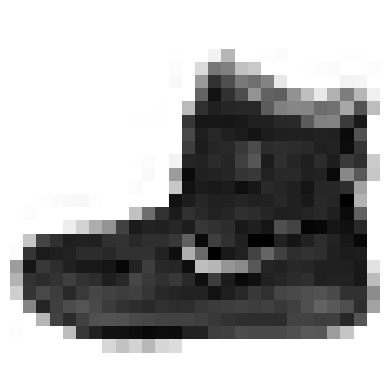

In [ ]:
plt.imshow(X_train[0], cmap='gray_r')
plt.axis('off')

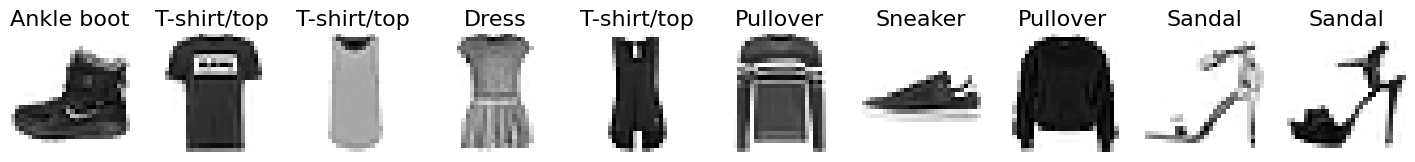

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(18, 13))
for i in range(1, 11):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_train[i-1], cmap='gray_r')
    plt.title(class_names[y_train[i-1]], color='black', fontsize=16)
plt.show()

In [ ]:
# Standaryzacja danych
X_train = X_train / 255.
X_test = X_test / 255.

In [ ]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

# Budowa modelu

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


epochs - ile razy zestaw treningowy zostanie przetworzony przez model. Przy każdej iteracji optymalizator próbuje dopasować wagi, aby funkcja celu została zminimalizowana

batch_size - liczba przykładów treningowych po której następuje aktualizacja wag

validation_split - procent danych użytych do walidacji

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.2)

Epoch 1/10
4800/4800 [==============================] - 15s 3ms/step - loss: 0.5157 - accuracy: 0.8197 - val_loss: 0.4465 - val_accuracy: 0.8459
Epoch 2/10
4800/4800 [==============================] - 12s 2ms/step - loss: 0.4203 - accuracy: 0.8590 - val_loss: 0.4621 - val_accuracy: 0.8553
Epoch 3/10
4800/4800 [==============================] - 9s 2ms/step - loss: 0.3983 - accuracy: 0.8705 - val_loss: 0.4488 - val_accuracy: 0.8702
Epoch 4/10
4800/4800 [==============================] - 10s 2ms/step - loss: 0.3926 - accuracy: 0.8774 - val_loss: 0.4177 - val_accuracy: 0.8786
Epoch 5/10
4800/4800 [==============================] - 9s 2ms/step - loss: 0.3776 - accuracy: 0.8790 - val_loss: 0.5323 - val_accuracy: 0.8658
Epoch 6/10
4800/4800 [==============================] - 9s 2ms/step - loss: 0.3758 - accuracy: 0.8848 - val_loss: 0.4416 - val_accuracy: 0.8704
Epoch 7/10
4800/4800 [==============================] - 9s 2ms/step - loss: 0.3753 - accuracy: 0.8872 - val_loss: 0.4505 - val_accura

In [ ]:
metrics = pd.DataFrame(history.history)
metrics['epoch'] = history.epoch
metrics

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.515709,0.819708,0.446526,0.845917,0
1,0.420265,0.859042,0.462051,0.855250,1
2,0.398322,0.870479,0.448757,0.870167,2
3,0.392580,0.877417,0.417707,0.878583,3
4,0.377576,0.879000,0.532341,0.865833,4
5,0.375820,0.884833,0.441567,0.870417,5
6,0.375349,0.887167,0.450471,0.876917,6
7,0.368598,0.890938,0.491941,0.867083,7
8,0.371007,0.891333,0.498447,0.874083,8
9,0.364631,0.893750,0.541881,0.873833,9


# Ocena modelu

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['accuracy'], name='accuracy'), row=1, col=1)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['loss'], name='loss'), row=1, col=2)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['val_accuracy'], name='val_accuracy'), row=1, col=1)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['val_loss'], name='val_loss'), row=1, col=2)

fig.update_xaxes(title_text='epochs')
fig.update_yaxes(title_text='accuracy')
fig.update_layout(width=1000, title='Accuracy and Loss')

fig.show()

In [ ]:
# Ocena modelu za pomocą metody evaluate

test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(test_acc)

0.8640000224113464


# Predykcja na podstawie modelu:

*model.evaluate(y_true, y_pred) - pozwala obliczyć metryki modelu

*model.predict_classes() - pozwala zwrócić odpowiednio przewidziane klasy

*model.predict_proba(), model.predict() - pozwala zwrócić prawdopodobienstwo danej klasy

In [ ]:
predictions = model.predict(X_test)
predictions

313/313 [==============================] - 1s 2ms/step


array([[0.000000000265, 0.            , 0.000000000004, ..., 0.00001045211 , 0.000000000117, 0.9999879     ],
       [0.000000000629, 0.            , 0.9999992     , ..., 0.            , 0.            , 0.            ],
       [0.            , 0.99999994    , 0.            , ..., 0.            , 0.            , 0.            ],
       ...,
       [0.00001343393 , 0.            , 0.000000007974, ..., 0.00000000082 , 0.998754      , 0.000000174747],
       [0.            , 0.99999994    , 0.            , ..., 0.            , 0.            , 0.            ],
       [0.000001318958, 0.00000392781 , 0.000002611764, ..., 0.009976605   , 0.000012595006, 0.000000920586]], dtype=float32)

In [ ]:
predictions_df = pd.DataFrame(predictions)
predictions_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000002,0.000000,0.000010,0.000000,0.999988
1,0.000000,0.000000,0.999999,0.000000,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000
2,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.011560,0.000000,0.000812,0.000004,0.000169,0.000000,0.987455,0.000000,0.000000,0.000000


In [ ]:
predictions_cls = model.predict_classes(X_test) # ta funckja została usunięta, jeśli chce działać w ten sposób teraz musze stworzyc liste na podstawie argmax z kazdego wiersza
predictions_cls

AttributeError: ignored

# Transfer Learning z użyciem Tensorflow Hub

In [ ]:
# Import bibliotek
import numpy as np
import PIL.Image as Image
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [ ]:
# Załadowanie modelu

classifier_url ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"

IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer(classifier_url, input_shape=IMAGE_SHAPE+(3,))
])

In [ ]:
# Załadowanie etykiet

labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())
imagenet_labels

10484/10484 [==============================] - 0s 1us/step


array(['background', 'tench', 'goldfish', ..., 'bolete', 'ear', 'toilet tissue'], dtype='<U30')

In [ ]:
# Załadowanie obrazu
from google.colab import files
uploaded = files.upload()


Saving office.png to office.png


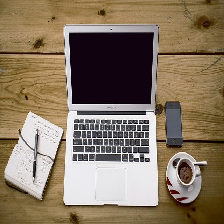

In [ ]:
filename = list(uploaded.keys())[0]
img = Image.open(filename).resize(IMAGE_SHAPE)
img

In [ ]:
# Predykcja na podstawie modelu

img_arr = np.array(img) / 255.0
img_arr = np.expand_dims(img_arr, axis=0)
result = classifier.predict(img_arr)
predicted_class = np.argmax(result[0], axis=-1)
predicted_class_name = imagenet_labels[predicted_class]
predicted_class_name

1/1 [==============================] - 1s 506ms/step


'notebook'

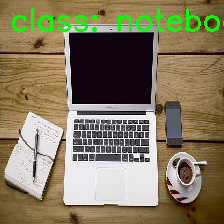

In [ ]:
# Wyświetlenie predykcji
from google.colab.patches import cv2_imshow
import cv2

img = cv2.imread(filename)
text = f'class: {predicted_class_name}'
img = cv2.putText(img=img, text=text, org=(10, 30), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(0, 255, 0), thickness=2)
cv2_imshow(img)